In [15]:
import os
from dotenv import load_dotenv

In [16]:
load_dotenv()

True

## Using Chat Models
https://python.langchain.com/docs/integrations/chat/

In [14]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-3.5-turbo", model_provider="openai")
model.invoke("The sky is")

AIMessage(content="The sky is the expanse above the Earth's surface, often appearing blue during the day due due to the scattering of sunlight by the atmosphere. It can also display a variety of colors and phenomena, such as sunrise, sunset, clouds, stars, and the moon.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 10, 'total_tokens': 63, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_f12167b370', 'id': 'chatcmpl-BmFBKBLy8VTlsrenZ4NFLbhKIWIJE', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1ebfc6a3-d13c-49b7-b039-7132245699fd-0', usage_metadata={'input_tokens': 10, 'output_tokens': 53, 'total_tokens': 63, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'ou

## Using ChatOpenAI directly
https://python.langchain.com/docs/integrations/chat/openai/

In [20]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-3.5-turbo",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # base_url="...",
    # organization="...",
    # other params...
)

In [18]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to Russian. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = model.invoke(messages)
ai_msg

AIMessage(content='Я люблю программирование.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 31, 'total_tokens': 36, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BmFIJwWhLs9EXln1Gx70OEJgX7zOI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--dde3531c-8fbe-40ee-aded-3e85daa50dc6-0', usage_metadata={'input_tokens': 31, 'output_tokens': 5, 'total_tokens': 36, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## LLM Roles

**Human Message**
A message sent from the perspective of the human, with the user role

**AI Message**
A message sent from the perspective of the AI that the human is interacting with, with the assistant role

**System Message**
A message setting the instructions the AI should follow, with the system role

**Chat Message**
A message allowing for arbitrary setting of role

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

system_msg = SystemMessage(
'''You are a helpful assistant that responds to questions with three exclamation marks.'''
)
human_msg = HumanMessage('What is the capital of France?')

model.invoke([system_msg, human_msg])

## Chaining
Making LLMs dynamic

In [26]:
# Define template to be reused be prompts
template = ChatPromptTemplate.from_messages(
    [
        (
            'system', 
            '''Answer the question based on the context below. If the
            question cannot be answered using the information provided, answer with
            "I don\'t know".'''
        ),
        ('human', 'Context: {context}'),
        ('human', 'Question: {question}'),
    ]
)

# write prompts that fill in the variables from the template
prompt = template.invoke(
    {
        "context": """The most recent advancements in NLP are being driven by Large
        Language Models (LLMs). These models outperform their smaller
        counterparts and have become invaluable for developers who are creating
        applications with NLP capabilities. Developers can tap into these
        models through Hugging Face's `transformers` library, or by utilizing
        OpenAI and Cohere's offerings through the `openai` and `cohere`
        libraries, respectively.""",
        "question": "Which model providers offer LLMs?"
    }
)
# prompt2 = template.invoke(...)
# prompt3 = template.invoke(...)
# ...

completion = model.invoke(prompt)
print(completion)

content='OpenAI and Cohere offer Large Language Models (LLMs) through their libraries `openai` and `cohere`, respectively.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 152, 'total_tokens': 179, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BmG2VaBhaDKRZl5n8Vn3xYCDB2MHA', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--c0d67699-199c-4bc3-8f25-08c6b0a5a9f0-0' usage_metadata={'input_tokens': 152, 'output_tokens': 27, 'total_tokens': 179, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


## JSON Output

1. Define a schema (Pydantic)
2. The method `with_structured_output` will use that schema for two things:
   - Schema is converted to JSONSchema object, which Langchain uses under the hood to put the best method with the LLM
   - Schema will be used as a validation for the output of the LLM before returning it, ensuring the output is exactly what you want

In [ ]:
from langchain_core.pydantic_v1 import BaseModel

class AnswerWithJustification(BaseModel):
    '''An answer to the user's question along with justification for the answer.'''
    
    answer: str  # the answer to the user's question
    justification: str  # justification for the answer
    
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
structured_llm = llm.with_structured_output(AnswerWithJustification)
structured_llm.invoke("""What weighs more, a pound of bricks or a pound of feathers""")

## Other Formats

Can also convert LLM I/O's to any machine readable format (CSV, XML, etc.)

In [ ]:
from langchain_core.output_parsers import CommaSeparatedListOutputParser

parser = CommaSeparatedListOutputParser()
items = parser.invoke("apple, banana, cherry")

## LangChain Output Methods

- invoke: transforms a single input into an output
- batch: efficiently transforms multiple inputs into multiple outputs
- stream: streams output from a single input as it’s produced

In [ ]:
completion = model.invoke('Hi there!')
# Hi!

completions = model.batch(['Hi there!', 'Bye!'])
# ['Hi!', 'See you!']

for token in model.stream('Bye!'):
    print(token)
# Good
# bye
# !

## Putting it all together

In [ ]:
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import chain

# the building blocks
template = ChatPromptTemplate.from_messages([
('system', 'You are a helpful assistant.'),
('human', '{question}'),
])
model = ChatOpenAI(model="gpt-3.5-turbo")

# combine them in a function
# @chain decorator adds the same Runnable interface for any function you write
@chain
def chatbot(values):
    prompt = template.invoke(values)
    return model.invoke(prompt)

# use it
chatbot.invoke({"question": "Which model providers offer LLMs?"})

## Imperative vs Declarative

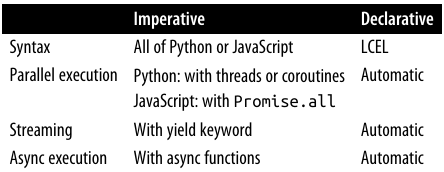

## Streaming & Async

- Streaming: lets you see partial results sooner.
- Async: allows concurrent execution, so you can do other things while waiting for a response.

In [ ]:
# Streaming

@chain
def chatbot(values):
    prompt = template.invoke(values)
    for token in model.stream(prompt):
        yield token
    
for part in chatbot.stream({
    "question": "Which model providers offer LLMs?"
}):
    print(part)

In [ ]:
# Async

@chain
async def chatbot(values):
    prompt = await template.ainvoke(values)
    return await model.ainvoke(prompt)
    
await chatbot.ainvoke({"question": "Which model providers offer LLMs?"})

In [ ]:
# Putting both together
# Example in FastAPI

@app.post("/chat")
async def chat_endpoint(request: Request):
    async def token_stream():
        async for chunk in model.astream(prompt):
            yield chunk.content

    return StreamingResponse(token_stream(), media_type="text/plain")

## LCEL (automatic streaming, async, parallelism, etc.)

In [ ]:
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# the building blocks
template = ChatPromptTemplate.from_messages([
('system', 'You are a helpful assistant.'),
('human', '{question}'),
])

# combine them with the | operator
chatbot = template | model

chatbot.invoke({"question": "Which model providers offer LLMs?"})

In [ ]:
# This is all that is necessary for streaming using LCEL
for part in chatbot.stream({
    "question": "Which model providers offer LLMs?"
}):
    print(part)

In [ ]:
# And for async it is the same as before
await chatbot.ainvoke({
    "questions": "Which model providers offer LLMs?"
})